In [28]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
import datetime as dt
%matplotlib inline     
sns.set(color_codes=True)

In [30]:
df = pd.read_excel("union_vif_ds.xlsx")

In [4]:
df.dtypes

Unnamed: 0                       int64
numero_documento                 int64
fecha_denuncia          datetime64[ns]
ocupacion                       object
edad                             int64
testigo                          int64
arma_medio                      object
modalidad_1257                  object
modalidad_294                   object
nivel_academico                 object
sexo                            object
Número denuncias vif             int64
relato                          object
DS                               int64
Homicido                       float64
reincidente total                int64
dtype: object

In [5]:
df["anio"] = df["fecha_denuncia"].dt.year
df["rango_edad"]= pd.cut(df.edad,bins=[0,5,13,17,28, 39, 60, 100], labels=["0-5", "6-13", "14-17", "18-28", "29-39", "40-59", "Mayor 60"])

In [6]:
pd.crosstab(df.sexo, df.rango_edad)

rango_edad,0-5,6-13,14-17,18-28,29-39,40-59,Mayor 60
sexo,,,,,,,
Hombre,5,34,79,904,1071,1687,1221
Mujer,11,41,444,8444,8261,8528,3114


In [31]:
pd.crosstab(df.sexo, df["arma_medio"])

arma_medio,Arma cortopunzante,Arma de fuego,Objeto contundente,Otro explosivo,Sin arma,Vehículo
sexo,,,,,,
Hombre,360,7,105,1,4584,9
Mujer,1253,81,282,5,27597,42


In [8]:
pd.crosstab(df.sexo, df["testigo"])

testigo,-1,0,1
sexo,,,
Hombre,158,2404,2504
Mujer,910,14744,13606


<Axes: xlabel='edad'>

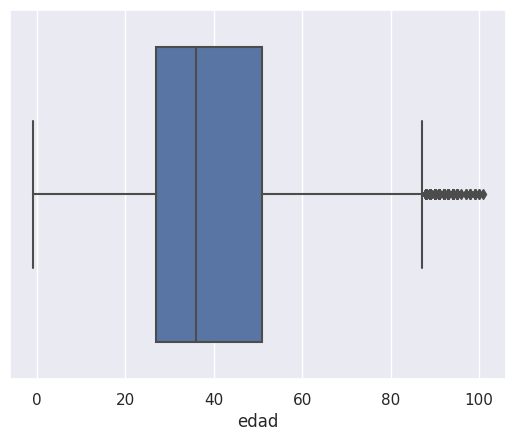

In [9]:
sns.boxplot(x=df['edad'])

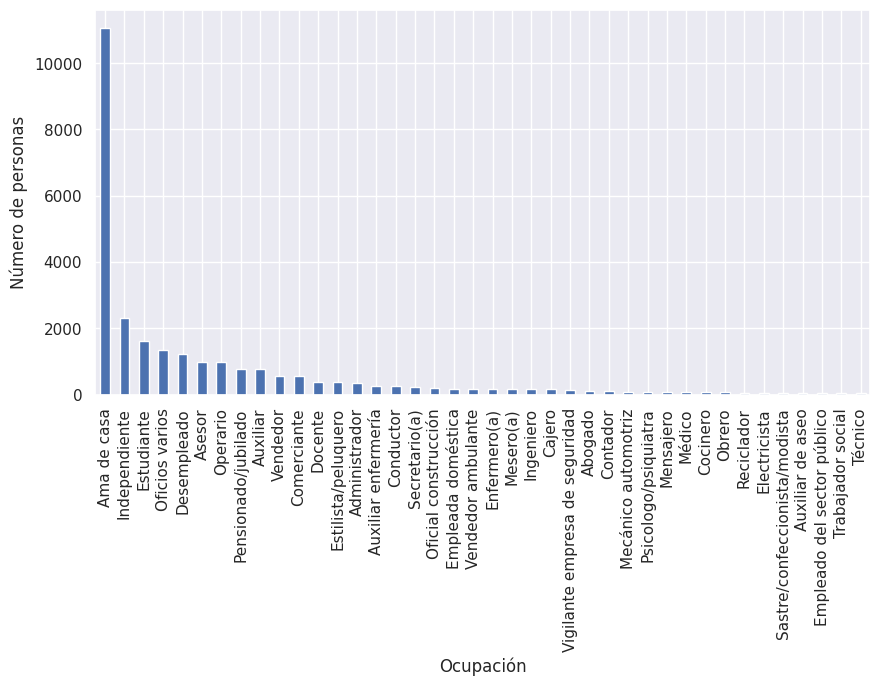

In [10]:
df.ocupacion.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.ylabel('Número de personas')
plt.xlabel('Ocupación');

In [11]:
df.ocupacion.value_counts()

Ama de casa             11067
Independiente            2294
Estudiante               1626
Oficios varios           1332
Desempleado              1231
                        ...  
Mayordomo                   2
Barman                      1
Cobrador                    1
Recolector de basura        1
Magistrado                  1
Name: ocupacion, Length: 63, dtype: int64

In [12]:
df_c0 = df[df['reincidente total'] == 0]
df_c1 = df[df['reincidente total'] == 1]


Text(0.5, 0, 'Edad')

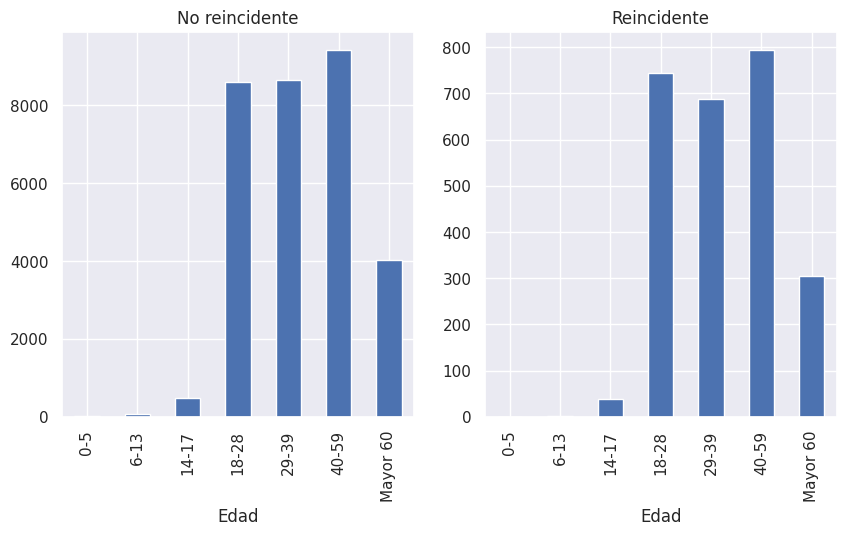

In [18]:
# group by c2 and count the values
grouped_c1_0 = df_c0.groupby('rango_edad')['reincidente total'].count()
grouped_c1_1 = df_c1.groupby('rango_edad')['reincidente total'].count()

# create two bar plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

grouped_c1_0.plot(kind='bar', ax=ax1)
ax1.set_title('No reincidente')
ax1.set_xlabel('Edad')

grouped_c1_1.plot(kind='bar', ax=ax2)
ax2.set_title('Reincidente')
ax2.set_xlabel('Edad')

Text(0.5, 0, 'Arma')

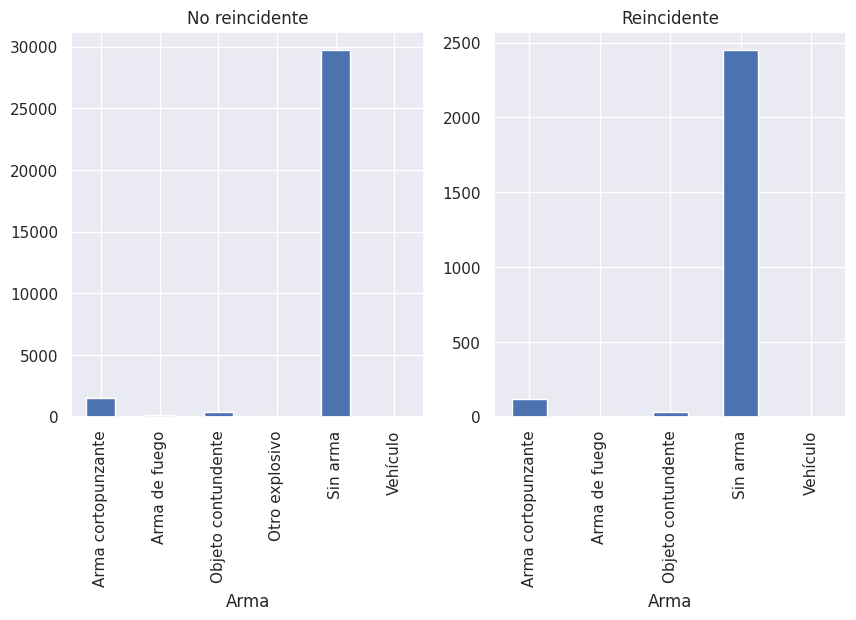

In [19]:
# group by c2 and count the values
grouped_c1_0 = df_c0.groupby('arma_medio')['reincidente total'].count()
grouped_c1_1 = df_c1.groupby('arma_medio')['reincidente total'].count()

# create two bar plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

grouped_c1_0.plot(kind='bar', ax=ax1)
ax1.set_title('No reincidente')
ax1.set_xlabel('Arma')

grouped_c1_1.plot(kind='bar', ax=ax2)
ax2.set_title('Reincidente')
ax2.set_xlabel('Arma')

Text(0.5, 0, 'Modalidad 1257')

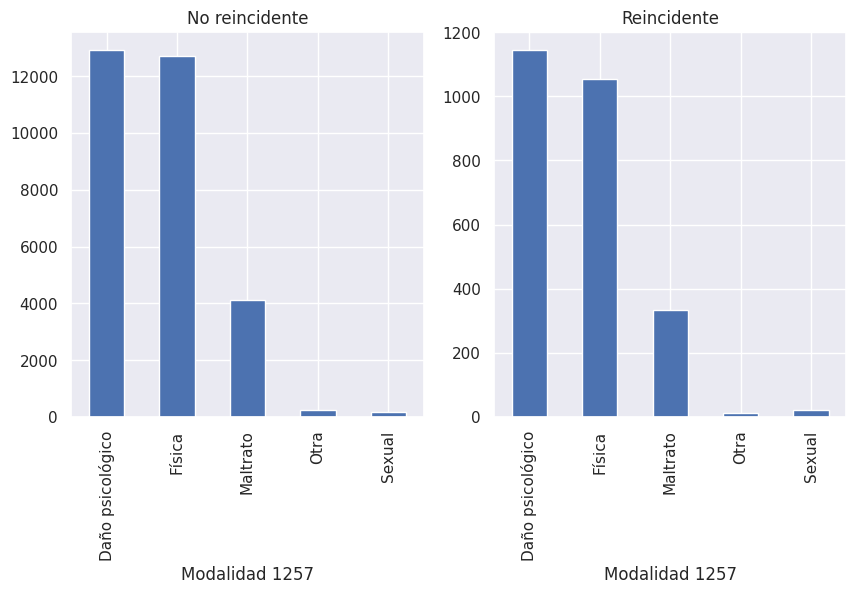

In [20]:
# group by c2 and count the values
grouped_c1_0 = df_c0.groupby('modalidad_1257')['reincidente total'].count()
grouped_c1_1 = df_c1.groupby('modalidad_1257')['reincidente total'].count()

# create two bar plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

grouped_c1_0.plot(kind='bar', ax=ax1)
ax1.set_title('No reincidente')
ax1.set_xlabel('Modalidad 1257')

grouped_c1_1.plot(kind='bar', ax=ax2)
ax2.set_title('Reincidente')
ax2.set_xlabel('Modalidad 1257')

Text(0.5, 0, 'Modalidad 294')

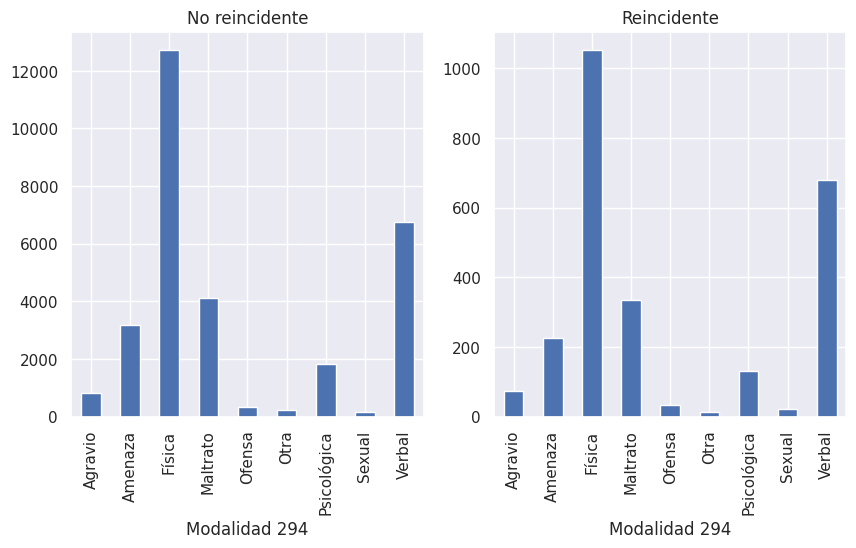

In [21]:
# group by c2 and count the values
grouped_c1_0 = df_c0.groupby('modalidad_294')['reincidente total'].count()
grouped_c1_1 = df_c1.groupby('modalidad_294')['reincidente total'].count()

# create two bar plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

grouped_c1_0.plot(kind='bar', ax=ax1)
ax1.set_title('No reincidente')
ax1.set_xlabel('Modalidad 294')

grouped_c1_1.plot(kind='bar', ax=ax2)
ax2.set_title('Reincidente')
ax2.set_xlabel('Modalidad 294')

Text(0.5, 0, 'Nivel académico')

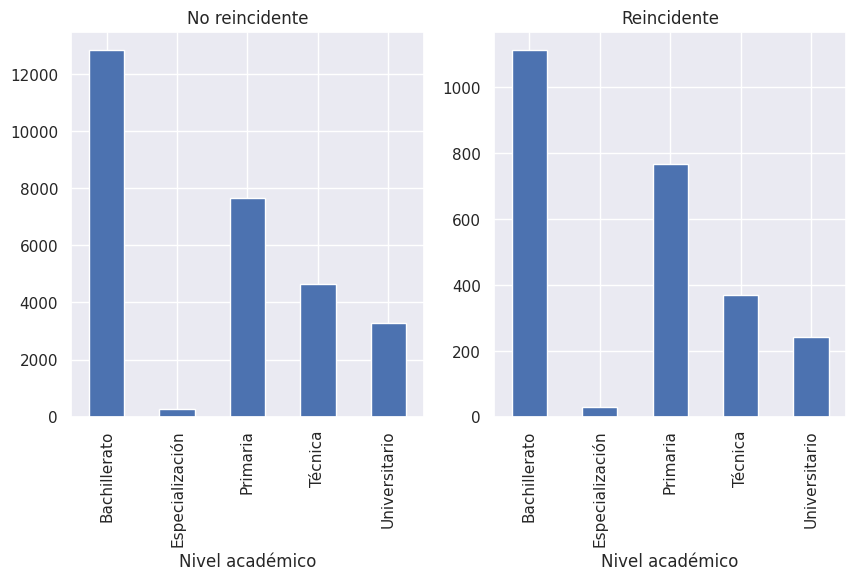

In [22]:
# group by c2 and count the values
grouped_c1_0 = df_c0.groupby('nivel_academico')['reincidente total'].count()
grouped_c1_1 = df_c1.groupby('nivel_academico')['reincidente total'].count()

# create two bar plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

grouped_c1_0.plot(kind='bar', ax=ax1)
ax1.set_title('No reincidente')
ax1.set_xlabel('Nivel académico')

grouped_c1_1.plot(kind='bar', ax=ax2)
ax2.set_title('Reincidente')
ax2.set_xlabel('Nivel académico')

In [27]:
grouped_c1_1

nivel_academico
Bachillerato       1114
Especialización      28
Primaria            769
Técnica             371
Universitario       241
Name: reincidente total, dtype: int64